In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Mall Customer Data**

  - It has four columns having CustomerID , Gender,Age,income and Spending score
  - Spending score between 1 - 100
  - More spending score means more valuable customer
  - Income and spending score are the important variables

In [3]:
data = pd.read_csv("C:\\Users\\sures\\OneDrive\\Documents\\Data Science\\Data Sets\\Mall_Customers.csv")


In [4]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
#Select only income and spending score columns
#M-1 : select by using column
#M-2: select by using iloc
#M-3 : by droping unwanted columns

X = data.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

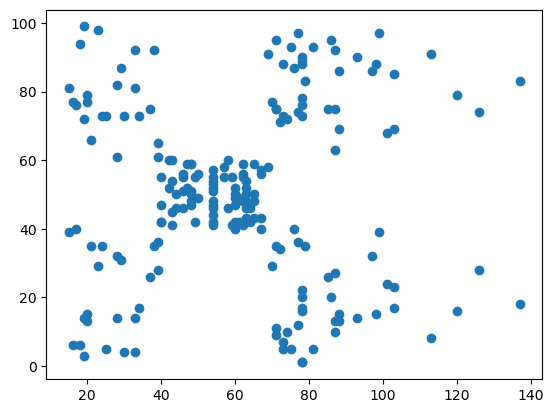

In [9]:
plt.scatter(data["Annual Income (k$)"],data['Spending Score (1-100)'])
plt.show()

$K-Means$

- We need to decide the number of clusters

- Method is called : Elbow Method

- Within sum of square

- We randomly give 10 clusters,for each cluster will calculate  Within sum of squares

**Elbow Method**
- Sum of squares with in the clusters (SSW)

  - Variance in the clusters
  - Variance in side the cluster shoulbe be low
 
- Sum of squares between the clusters (SSB)

  - Variance between the clusters
  - Varaince between the clusters should be max
  - Then only we can say that clusters apart from each other

**First we check for one cluster to understand within sum of squares concept**

In [11]:
from sklearn.cluster import KMeans

In [12]:
# just apply one cluster
#Base model

In [13]:
Kmeans_1 = KMeans(n_clusters=1,max_iter=300,random_state=1234)
Kmeans_1

KMeans(n_clusters=1, random_state=1234)

In [15]:
Kmeans_1.fit(X)

C:\Users\sures\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sures\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=1, random_state=1234)

**Inertia**

  - Measures how well a dataset was clustered by K-Means
  - It is calculated by measuring the distance between each data point and its centroid,squaring this distance
  - and summing these squares across one cluster

In [16]:
Kmeans_1.inertia_

269981.28

In [17]:
Kmeans_1.cluster_centers_

array([[60.56, 50.2 ]])

In [18]:
data["Annual Income (k$)"].mean()

60.56

In [19]:
data["Spending Score (1-100)"].mean()

50.2

**Try to identify optimal clusters using elbow method**

In [31]:
import warnings

warnings.filterwarnings('ignore')

wss = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i,max_iter=300,random_state=1234)
    kmeans.fit(X)
    wss.append(round(kmeans.inertia_,2))

In [32]:
wss

[269981.28,
 181363.6,
 106348.37,
 73679.79,
 44448.46,
 37239.84,
 31615.31,
 25028.02,
 21818.11]

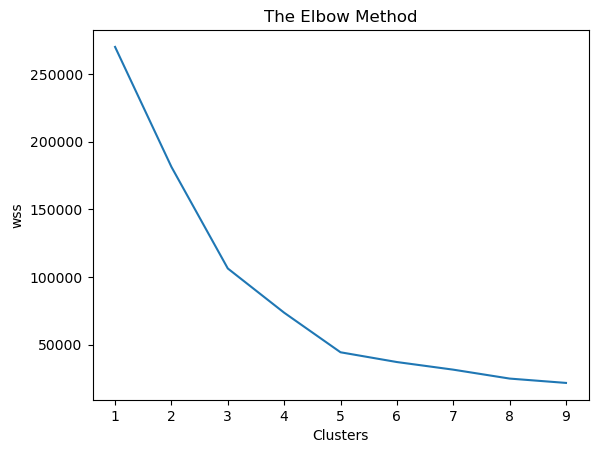

In [33]:
plt.plot(range(1,10),wss)
plt.title("The Elbow Method")
plt.xlabel("Clusters")
plt.ylabel("wss")
plt.show()

**Using the elbow method we decided number of cluster are 5**

In [41]:
kmeans = KMeans(n_clusters=5,max_iter=300,random_state=1234)
y_clusters = kmeans.fit_predict(X)  # which data point belongs to which cluster
y_clusters

#here 0 = cluster_1 and 4 = cluster_5  coz python index starts from index 0

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4,
       0, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 4, 1, 2, 1, 2, 1,
       4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [42]:
data["Cluster_group"] = y_clusters

In [43]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


In [44]:
data['Cluster_group'].value_counts()

Cluster_group
4    81
1    39
2    35
0    23
3    22
Name: count, dtype: int64

In [46]:
data[data['Cluster_group']==0].iloc[:,[3,4]]

#data[data["Cluster_group"]==0][["Annual Income"],["Spending score"]]

,Annual Income (k$),Spending Score (1-100)
0,15,39
2,16,6
4,17,40
6,18,6
8,19,3
10,19,14
12,20,15
14,20,13
16,21,35
18,23,29


In [48]:
#group the data points

cs_1 = data[data['Cluster_group']==0].iloc[:,[3,4]]
cs_2 = data[data['Cluster_group']==1].iloc[:,[3,4]]
cs_3 = data[data['Cluster_group']==2].iloc[:,[3,4]]
cs_4 = data[data['Cluster_group']==3].iloc[:,[3,4]]
cs_5 = data[data['Cluster_group']==4].iloc[:,[3,4]]

d1 = {'Cluster-1': cs_1.mean(),
 'Cluster-2': cs_2.mean(),
 'Cluster-3': cs_3.mean(),
 'Cluster-4': cs_4.mean(),
 'Cluster-5': cs_5.mean()
}
pd.DataFrame(d1)

,Cluster-1,Cluster-2,Cluster-3,Cluster-4,Cluster-5
Annual Income (k$),26.304348,86.538462,88.200000,25.727273,55.296296
Spending Score (1-100),20.913043,82.128205,17.114286,79.363636,49.518519


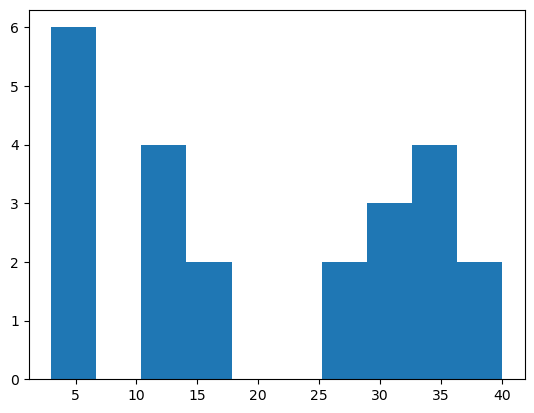

In [49]:
plt.hist(cs_1['Spending Score (1-100)'])
plt.show()

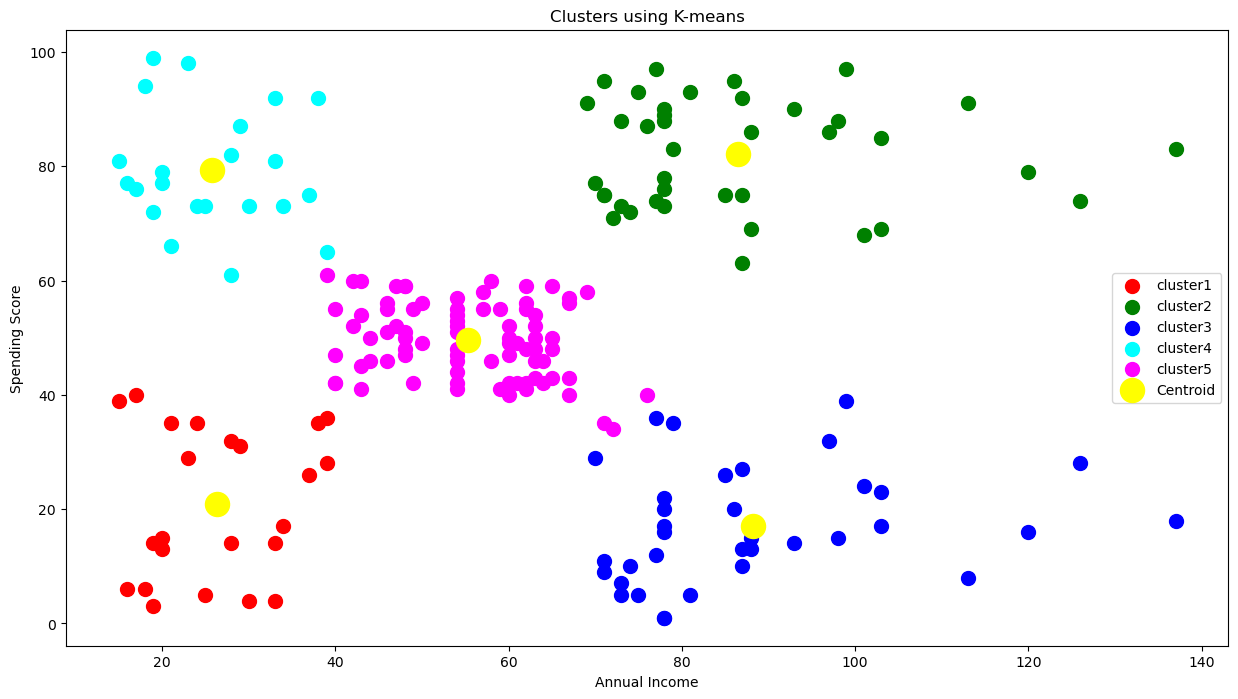

In [52]:
#Visualize the clusters
# We are applying scatters plot between income and score w.r.t clusters

plt.figure(figsize=(15,8))
plt.scatter(X[y_clusters == 0,0],X[y_clusters == 0,1],s=100,c ='red',label="cluster1")
plt.scatter(X[y_clusters == 1,0],X[y_clusters == 1,1],s=100,c ='green',label="cluster2")
plt.scatter(X[y_clusters == 2,0],X[y_clusters == 2,1],s=100,c ='blue',label="cluster3")
plt.scatter(X[y_clusters == 3,0],X[y_clusters == 3,1],s=100,c ='cyan',label="cluster4")
plt.scatter(X[y_clusters == 4,0],X[y_clusters == 4,1],s=100,c ='magenta',label="cluster5")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label="Centroid")

plt.title("Clusters using K-means")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

# Where s will give the size of the centroid